## Histogram Equalization 
### Girish Kumar
### N160485


<b> Calculation reference from this image </b>
Below code is based on the image

<img src="cal_ref.png">,


In [1]:
import pandas as pd
import numpy as np
import cv2 as cv


In [2]:
import matplotlib.pyplot as plt

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}
dict_keys([0, 1, 2, 3, 4, 5, 6, 7])
[0, 0, 0, 2, 6, 7, 7, 7]
{0: 0, 1: 0, 2: 0, 3: 2, 4: 6, 5: 7, 6: 7}
[[6 6 6 6 6]
 [2 6 7 6 2]
 [2 7 7 7 2]
 [2 6 7 6 2]
 [6 6 6 6 6]]


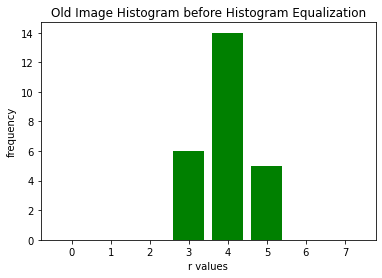

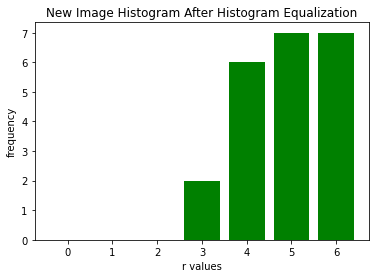

,grey-level,pixcel_freq,pdf,cdf,new_pixecl,appox_pixel
0,0,0,0.00,0.00,0.00,0
1,1,0,0.00,0.00,0.00,0
2,2,0,0.00,0.00,0.00,0
3,3,6,0.24,0.24,1.68,2
4,4,14,0.56,0.80,5.60,6
5,5,5,0.20,1.00,7.00,7
6,6,0,0.00,1.00,7.00,7
7,7,0,0.00,1.00,7.00,7


In [3]:
#let take an 2d numpy array as image
img = np.array([[4,4,4,4,4],[3,4,5,4,3],[3,5,5,5,3],[3,4,5,4,3],[4,4,4,4,4]],dtype=np.uint8)
#find the max pixcel value in image
max_pixel=img.max()

# let find the number of bits requried to max pixel in image my case is 3 for max pixcel 5 2**3=8 it is near to 5
gray_level =np.arange(0,2**3)

#intialize the dict
count_dict={}

#for the gray_level value [0,1,2....7]
for i in range(0,2**3):
    count_dict[i]=0
print(count_dict)
# it prints {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}


# for find the freq for each pixel in image
for i in img:
    for  j in i:
        if(j not in count_dict):
            count_dict[j]=1
        else:
            count_dict[j]=count_dict[j]+1
    

print(count_dict.keys())
#it prints {0: 0, 1: 0, 2: 0, 3: 2, 4: 6, 5: 7, 6: 7}

#for the ease of making some statics i use pandas 
d=count_dict.keys()
pd.DataFrame()

df= pd.DataFrame({"grey-level":list(count_dict.keys()),"pixcel_freq":list(count_dict.values())})

sum = df["pixcel_freq"].sum()

#pdf=pixel_freq/sum

df['pdf']=df['pixcel_freq']/sum
df['cdf']=df['pdf'].cumsum()

#new_pixcel=cdf*7 where 7 is the maxium pixel from the 3 bits
df['new_pixecl']=df['cdf']*7
df['appox_pixel']=df['new_pixecl'].round().astype(int)

s=df['appox_pixel'].tolist()

print(s)
r=[i for i in range(0,7)]
new_img_dict = dict(zip(r,s))
print(new_img_dict)



for i in range(len(img)):
    for j in range(len(img[i])):
        img[i][j]=new_img_dict[img[i][j]]
       
new_img=img

#print new img 
print(new_img)

#plot the changes in histogram
plt.title("Old Image Histogram before Histogram Equalization")
plt.xlabel("r values")
plt.ylabel("frequency")
plt.bar(list(count_dict.keys()), count_dict.values(), color='g')
plt.show()
plt.title("New Image Histogram After Histogram Equalization")
plt.xlabel("r values")
plt.ylabel("frequency")
plt.bar(list(new_img_dict.keys()), new_img_dict.values(), color='g')
plt.show()

df


In [4]:
cv.imshow("img",img)
cv.waitKey(0)

-1

255


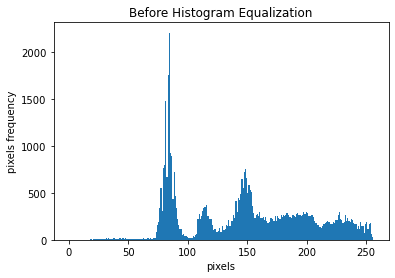

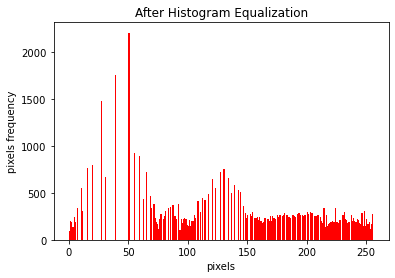

-1

In [15]:
# with using openCv

img = cv.imread("temp.jpg",0)
print(img.max())


cv.imshow("img",img)
plt.title("Before Histogram Equalization")
plt.xlabel('pixels')
plt.ylabel("pixels frequency")
plt.hist(img.ravel(),256,[0,256])
plt.show()

#cv.equalizeHist(image) make the hoistogram equalize
equ=cv.equalizeHist(img)
cv.imshow("equ",equ)

plt.title("After Histogram Equalization")
plt.xlabel('pixels')
plt.ylabel("pixels frequency")
plt.hist(res.ravel(),256,[0,256],color="red")
plt.show()


cv.waitKey(0)